# Working with the Data object in naplib-python

This example shows some of the basic operations that can be performed on the Data object. We first import from a Matlab file, then process it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import naplib as nl

## Creating a Data Object from Scratch

If we have data in our own custom format or as numpy arrays, we can easily put them into a Data object. Here, we generate response data randomly, and the stimuli are pure tone sine waves.

In [2]:
nCh = 20 # number of recording channels in the responses
fs = 100 # sampling rate of the response data
audio_fs = 16000 # sampling rate of the audio stimuli
trial_lengths = [5.0, 6.7, 5.8] # length of each trial (in seconds)
tone_frequencies = [2, 5, 8] # frequency (Hz) of each trial's stimulus tone

trial_responses = [np.random.normal(size=(int(L*fs), nCh)) for L in trial_lengths]
trial_stimuli = [np.sin(2 * np.pi * freq * np.linspace(0, L, int(L*audio_fs))) for freq, L in zip(tone_frequencies, trial_lengths)]

data_dict = {'name': ['trial-1','trial-2','trial-3'],
             'soundf': [audio_fs, audio_fs, audio_fs],
             'sound': trial_stimuli,
             'dataf': [fs, fs, fs],
             'resp': trial_responses
             }

data = nl.Data(data_dict)

In [3]:
data

Data object of 3 trials containing 5 fields
[{"name": <class 'str'>, "soundf": <class 'int'>, "sound": <class 'numpy.ndarray'>, "dataf": <class 'int'>, "resp": <class 'numpy.ndarray'>}
{"name": <class 'str'>, "soundf": <class 'int'>, "sound": <class 'numpy.ndarray'>, "dataf": <class 'int'>, "resp": <class 'numpy.ndarray'>}
{"name": <class 'str'>, "soundf": <class 'int'>, "sound": <class 'numpy.ndarray'>, "dataf": <class 'int'>, "resp": <class 'numpy.ndarray'>}]

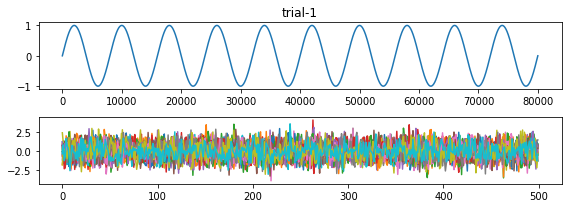

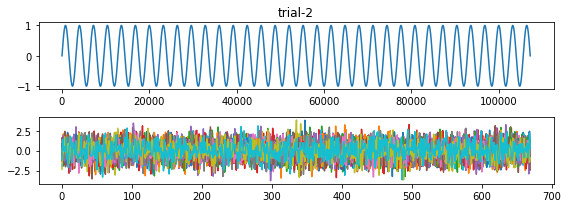

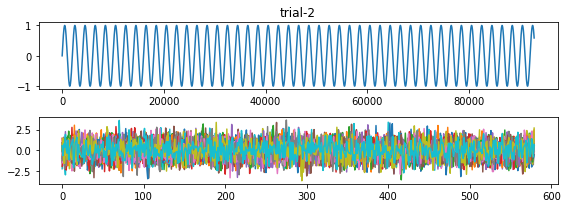

In [4]:
# We can plot the stimuli or responses easily

fig, axes = plt.subplots(2,1, figsize=(8,3))
axes[0].set_title('trial-1')
axes[0].plot(data[0]['sound'])
axes[1].plot(data[0]['resp'])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,1, figsize=(8,3))
axes[0].set_title('trial-2')
axes[0].plot(data[1]['sound'])
axes[1].plot(data[1]['resp'])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,1, figsize=(8,3))
axes[0].set_title('trial-2')
axes[0].plot(data[2]['sound'])
axes[1].plot(data[2]['resp'])
plt.tight_layout()
plt.show()

## Processing Pre-existing Data

Here, we load a sample Data object that we can analyze further

In [5]:
# We can import a sample data object to look at
data = nl.io.load_speech_task_data()

In [6]:
# Let's look at the data we have
print(len(data)) # number of trials/stimuli recorded
print(data.fields) # data fields available for each trial


10
['name', 'sound', 'soundf', 'dataf', 'duration', 'befaft', 'resp', 'aud', 'script']


In [7]:
# we can index into the trials using integer indices, or index into the fields with a string
third_trial = data[2]
print(third_trial)
print()
name_field = data['name']
print(name_field)

{'name': 'stim03', 'sound': array([0., 0., 0., ..., 0., 0., 0.]), 'soundf': 11025, 'dataf': 99.99999999999999, 'duration': 64.29516666666666, 'befaft': array([1, 1], dtype=uint8), 'resp': array([[ 0.41604034,  0.77723226,  0.45395763, ...,  0.85570403,
         0.56272047,  0.09818061],
       [ 0.45802294,  0.84613434,  0.44253459, ...,  0.70633655,
         0.42041068,  0.04464562],
       [ 0.53542696,  0.86736427,  0.43809604, ...,  0.58951701,
         0.41803545, -0.03769736],
       ...,
       [-0.08373752, -0.30536813, -0.1216121 , ..., -0.25760057,
        -0.05297981, -0.07776821],
       [-0.01008263, -0.21104712, -0.08157222, ..., -0.27183509,
        -0.03113036, -0.0836877 ],
       [ 0.01078927, -0.1495696 , -0.00454404, ..., -0.23391909,
        -0.08405745, -0.07488834]]), 'aud': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00

In [8]:
# we can also extract a smaller Data object which contains only a set of the
# fields by indexing a list of fieldnames
smaller_data = data[['name','soundf','resp']]
print(smaller_data)

Data object of 10 trials containing 3 fields
[{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}
{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}

...
{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}]



In [9]:
# we can also extract a smaller Data by indexing with slicing
# or a list of trial indices
smaller_data2 = data[[0,2,4,9]]
print(smaller_data2)
print()
smaller_data3 = data[1:5]
print(smaller_data3)

Data object of 4 trials containing 9 fields
[{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'int'>, "duration": <class 'float'>, "befaft": <class 'numpy.ndarray'>, "resp": <class 'numpy.ndarray'>, "aud": <class 'numpy.ndarray'>, "script": <class 'str'>}
{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'float'>, "duration": <class 'float'>, "befaft": <class 'numpy.ndarray'>, "resp": <class 'numpy.ndarray'>, "aud": <class 'numpy.ndarray'>, "script": <class 'str'>}

...
{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'float'>, "duration": <class 'float'>, "befaft": <class 'numpy.ndarray'>, "resp": <class 'numpy.ndarray'>, "aud": <class 'numpy.ndarray'>, "script": <class 'str'>}]


Data object of 4 trials containing 9 fields
[{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'float'>, "durat

In [10]:
# We can also iterate over the trials and get interesting information
for t, trial in enumerate(data[:3]): # only look at the first 3 trials
    print(f'trial {t}-----')
    print(type(trial)) # each trial is a dictionary object
    print(trial['name']) # we can access a single field of this trial, like the name


trial 0-----
<class 'dict'>
stim01
trial 1-----
<class 'dict'>
stim02
trial 2-----
<class 'dict'>
stim03


In [11]:
# we can also access a single field of all the trials by using data.get_field(), or just brackets
print([resp.shape for resp in data.get_field('resp')]) # shape of each trial: (time * num_elecs)
print([resp.shape for resp in data['resp']]) # equivalent to above


[(6197, 10), (5203, 10), (6430, 10), (6206, 10), (6560, 10), (7194, 10), (8540, 10), (6586, 10), (5904, 10), (5621, 10)]
[(6197, 10), (5203, 10), (6430, 10), (6206, 10), (6560, 10), (7194, 10), (8540, 10), (6586, 10), (5904, 10), (5621, 10)]


In [12]:
# We can also join different subjects data, such as concatenating their "resp"
# fields together to get the responses to all subjects' electrodes
import copy
data_other = copy.deepcopy(data)
print("this subject has {} electrodes...".format(data_other['resp'][0].shape[1])) # dimensions of 


# join the "resp" fields, now we have all electrodes data together
joined_responses = nl.join_fields([data, data_other], fieldname='resp', axis=-1)
print('after concatenating, each trial has shape:')
print([resp.shape for resp in joined_responses])


this subject has 10 electrodes...
after concatenating, each trial has shape:
[(6197, 20), (5203, 20), (6430, 20), (6206, 20), (6560, 20), (7194, 20), (8540, 20), (6586, 20), (5904, 20), (5621, 20)]


### Adding a new field to the Data

If we have some more data, labels, or something that we want to store in our Data as well, we can add a field to the Data. To add a field, you must pass in either a list of the same length as the Data which contains the data for this field for each trial, or a multidimensional array where the first index is the length of the Data.

In [13]:
# for example, let's add a new name for each and call the field "test_name"
new_field_data = [f'test{i}' for i in range(len(data))]
data['test_name'] = new_field_data
print(data.fields) # now we have a new field
print(data[0]['test_name']) # let's print the data in this field for the first trial

['name', 'sound', 'soundf', 'dataf', 'duration', 'befaft', 'resp', 'aud', 'script', 'test_name']
test0


### Processing a Data object

In [14]:
# now let's zscore the response data over time (and across all trials)
from naplib.preprocessing import normalize

norm_resp = normalize(data=data, field='resp', axis=0, method='zscore')


In [15]:
# we can also directly pass in the field as the data

norm_resp2 = normalize(field=data['resp'], axis=0, method='zscore')


In [16]:
# print out the standard deviation before and after normalization
# Note: the standard dev. is not exactly 1 because it was computed over the full out struct,
# not for each trial individually

print(data[0]['resp'].std(axis=0))
print(norm_resp[0].std(axis=0))
print(norm_resp2[0].std(axis=0))

[0.58760573 0.59299208 0.47151052 0.39690908 0.27045402 0.26375218
 0.2303239  0.31504238 0.41535562 0.47101352]
[1.05780002 1.01972356 0.91933579 1.05827536 0.91349099 1.15215668
 0.93407715 0.97692664 0.93844001 0.84102279]
[1.05780002 1.01972356 0.91933579 1.05827536 0.91349099 1.15215668
 0.93407715 0.97692664 0.93844001 0.84102279]


In [17]:
# looks good, so let's replace the 'resp' field in our Data with this new normalized resp
data['resp'] = norm_resp
print(data[0]['resp'].std(axis=0)) # now the normalized data is in the 'resp' field

[1.05780002 1.01972356 0.91933579 1.05827536 0.91349099 1.15215668
 0.93407715 0.97692664 0.93844001 0.84102279]
